In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf

In [3]:
start = '2009-12-31'
end = '2024-03-31'

data = yf.download('AAPL', start, end)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.362936,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358406,477131200


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-22,171.759995,173.050003,170.059998,172.279999,172.046646,71106600
2024-03-25,170.570007,171.940002,169.449997,170.850006,170.618591,54288300
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.480133,57388400
2024-03-27,170.410004,173.600006,170.110001,173.309998,173.075241,60273300
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.247726,65672700


In [5]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.362936,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358406,477131200


In [6]:
data = data.drop(['Date'], axis=1)
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,7.611786,7.619643,7.520000,7.526071,6.362936,352410800
1,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2,7.664286,7.699643,7.616071,7.656429,6.473149,601904800
3,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
4,7.562500,7.571429,7.466071,7.520714,6.358406,477131200


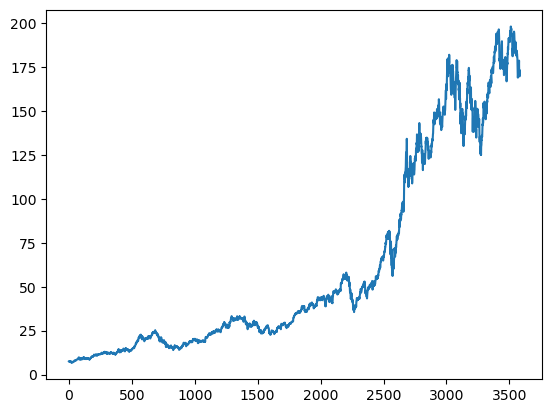

In [7]:
plt.plot(data.Close)

In [8]:
ma100 = data.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3579    185.3700
3580    185.3756
3581    185.3650
3582    185.3584
3583    185.2975
Name: Close, Length: 3584, dtype: float64

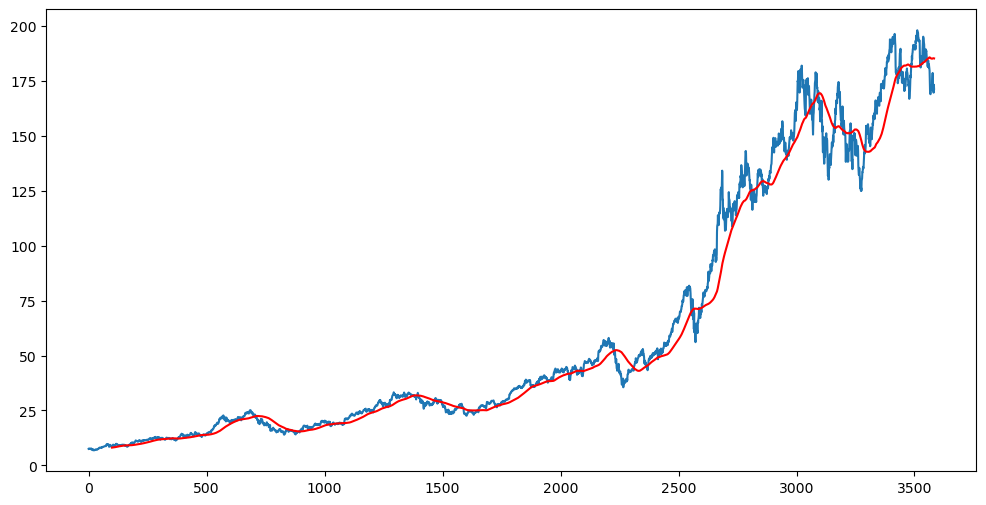

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'r')

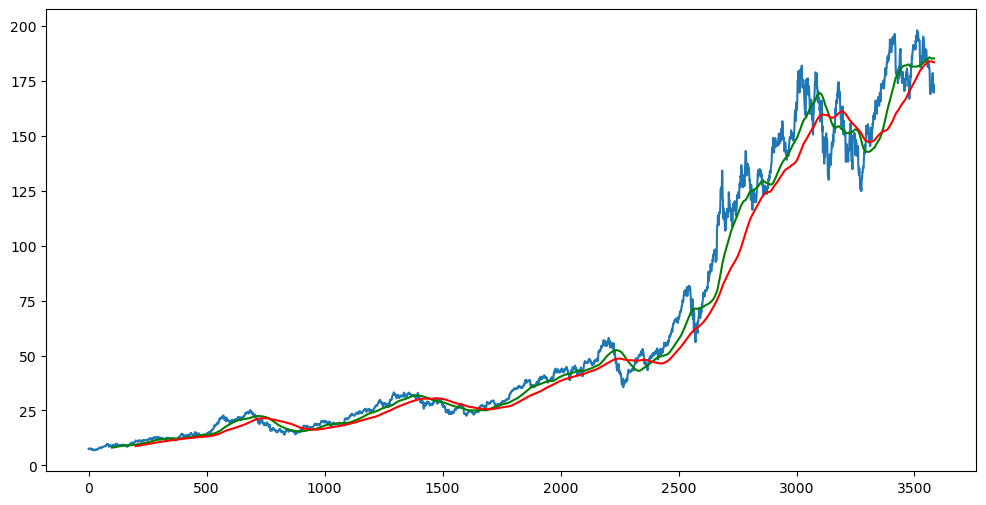

In [10]:
ma200 = data.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100, 'g')
plt.plot(ma200, 'r')

In [11]:
data.shape

(3584, 6)

In [12]:
#splitting the data into training and testing
data_train = pd.DataFrame(data['Close'][0:int(len(data)*0.7)])
data_test = pd.DataFrame(data['Close'][int(len(data)*0.7):int(len(data))])

print(data_test.shape)
print(data_train.shape)

(1076, 1)
(2508, 1)


In [13]:
data_train.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [14]:
data_test.head()

,Close
2508,69.934998
2509,70.004997
2510,69.860001
2511,71.000000
2512,71.067497


In [15]:
#converting data to 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_train_array = scaler.fit_transform(data_train)
data_train_array

array([[0.01054877],
       [0.01240102],
       [0.01260997],
       ...,
       [0.97920733],
       [0.99782579],
       [1.        ]])

In [33]:
'''The approach we are going to follow is:
We are going to assume that price of the stock on any nth day is dependent on the prices of the last 120 days (random number)
for every iteration we are going to forget one value at the start and going to take in the new predicted value.
For eg: iteration 1: prices be 23 27 24 30 31 32    predicted: 34
        iteration 2: prices    27 24 30 31 32 34    predicted: 35 and so on...
'''

x_train = []
y_train = []
for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

ML Model

In [34]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [35]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

    

c:\Users\91965\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=int(50))

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0267
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0053
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0042
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0037
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0034
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0032
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0032
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0034
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0025
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0026
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0023
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0020
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0022
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0021
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0020
Epoc

In [38]:
model.save('keras_model.h5')

In [39]:
data_test.head()

,Close
2508,69.934998
2509,70.004997
2510,69.860001
2511,71.000000
2512,71.067497


In [40]:
past_hundred_days = data_train.tail(100)
past_hundred_days

,Close
2408,52.419998
2409,52.195000
2410,53.259998
2411,52.107498
2412,51.005001
...,...
2503,67.692497
2504,67.864998
2505,68.787498
2506,69.964996


In [41]:
# final_df = past_hundred_days.add(data_test[1], axis=0)
data_test

,Close
2508,69.934998
2509,70.004997
2510,69.860001
2511,71.000000
2512,71.067497
...,...
3579,172.279999
3580,170.850006
3581,169.710007
3582,173.309998


In [42]:
final_df = pd.concat([past_hundred_days, data_test], ignore_index=True)

In [43]:
final_df.head()

,Close
0,52.419998
1,52.195000
2,53.259998
3,52.107498
4,51.005001


In [44]:
#Need to scale down this data again:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02727424],
       [0.025772  ],
       [0.03288265],
       ...,
       [0.81038228],
       [0.83441828],
       [0.82219994]])

In [45]:
input_data.shape

(1176, 1)

In [47]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [48]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [49]:
print(x_test.shape)
print(y_test.shape)

(1076, 100, 1)
(1076,)


In [50]:
#Making predictions:

y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [51]:
y_predicted.shape

(1076, 1)

In [52]:
y_test

array([0.14421631, 0.14468368, 0.14371558, ..., 0.81038228, 0.83441828,
       0.82219994])

In [53]:
y_predicted

array([[0.1379479 ],
       [0.14006658],
       [0.14198208],
       ...,
       [0.82006896],
       [0.81467164],
       [0.81581926]], dtype=float32)

In [54]:
scaler.scale_

array([0.00667668])

In [55]:
scale_factor = 1/0.00667668
y_predicted *= scale_factor
y_test *= scale_factor

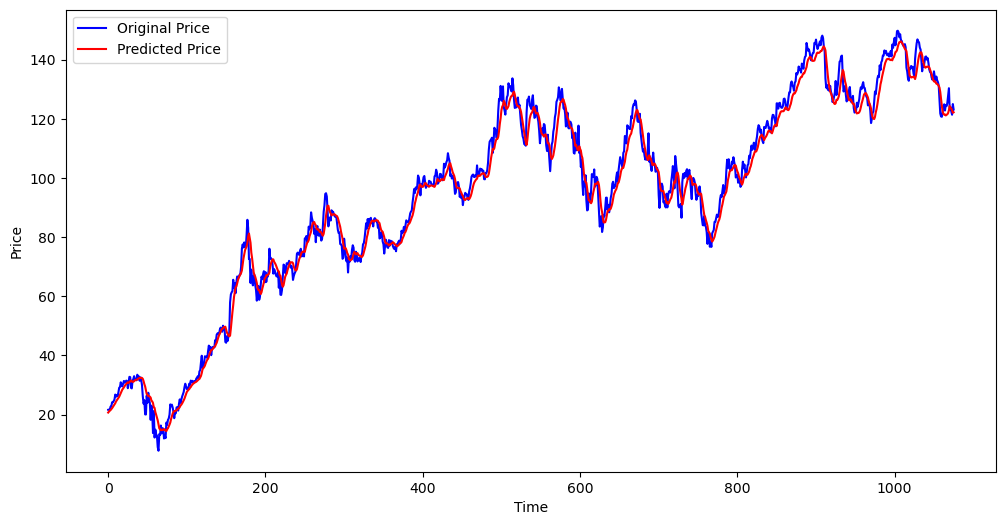

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
